# Predicting Credit Card Fraud

The goal for this analysis is to predict credit card fraud in the transactional data. I have used Keras to build the predictive model. I have also tried to see the threshold distribution and then arrive at an optimal threshold where one can maximize senstivity and specificity. If you would like to learn more about the data, visit: https://www.kaggle.com/dalpozz/creditcardfraud.

Please share your feedback and comment/upvote if you liked it.

The sections of this analysis include: 

 - Exploring the Data
 - Building the Neural Network 


In [1]:
import pandas as pd
import numpy as np 
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# from show_confusion_matrix import show_confusion_matrix 
# the above is from http://notmatthancock.github.io/2015/10/28/confusion-matrix.html

import matplotlib.gridspec as gridspec

#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score,cohen_kappa_score, roc_auc_score

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\katta\appd

In [2]:
df = pd.read_csv("C:\Santhosh\AIML\Github\Tensorflow\Credicard-fraud-detection\creditcard.csv")

## Exploring the Data

The data is mostly transformed from its original form, for confidentiality reasons.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values, that makes things a little easier.

Let's see how time compares across fraudulent and normal transactions.

In [5]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


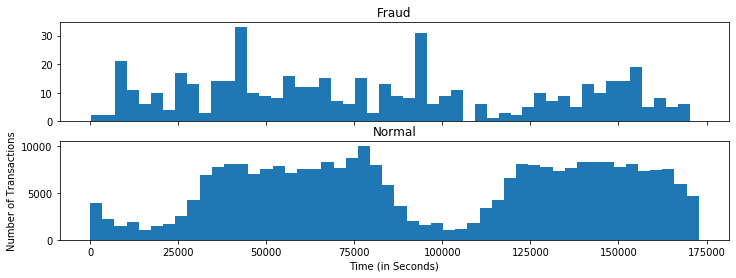

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Now let's see if the transaction amount differs between the two types.

In [7]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


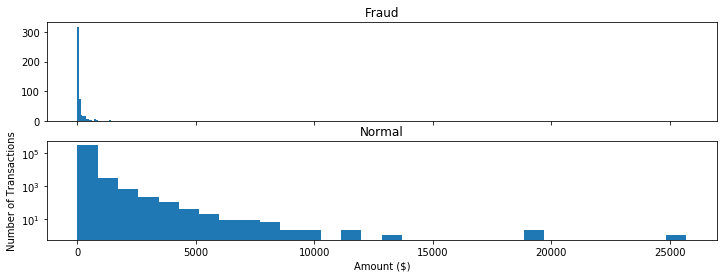

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [9]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

Most transactions are small amounts, less than $100. Fraudulent transactions have a maximum value far less than normal transactions, $2,125.87 vs $25,691.16.

Let's compare Time with Amount and see if we can learn anything new.

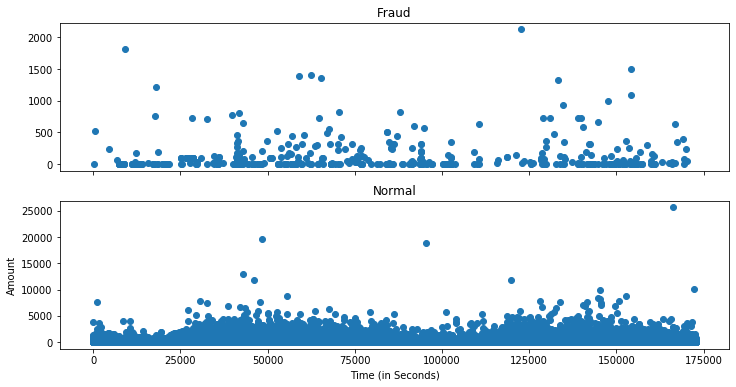

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing too useful here.

Next, let's take a look at the anonymized features.

In [11]:
#Select only the anonymized features.
v_features = df.ix[:,1:29].columns

c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
c:\users\katta\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


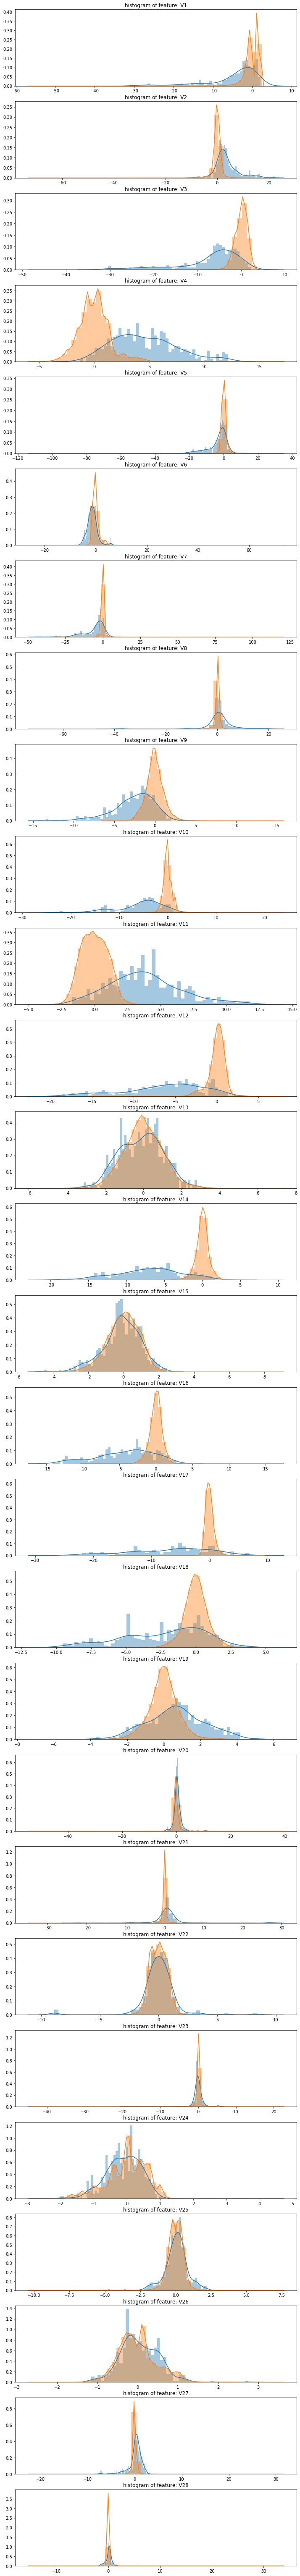

In [12]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [13]:
#Drop all of the features that have very similar distributions between the two types of transactions.
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [14]:
#Based on the plots above, these features are created to identify values where fraudulent transaction are more common.
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [15]:
#Create a new feature for normal (non-fraudulent) transactions.
#df.loc[df.Class == 0, 'Normal'] = 1
#df.loc[df.Class == 1, 'Normal'] = 0

In [16]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [17]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#Create dataframes of only Fraud and Normal transactions.
Fraud = df[df.Fraud == 1]
Normal = df[df.Fraud == 0]

In [19]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [20]:
#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [21]:
#Add our target features to y_train and y_test.
y_train = pd.DataFrame()
y_test = pd.DataFrame()
#y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Fraud], axis=1)

#y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Fraud], axis=1)

In [22]:
#Drop target features from X_train and X_test.
X_train = X_train.drop(['Fraud'], axis = 1)
X_test = X_test.drop(['Fraud'], axis = 1)

In [23]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

227846
227846
56961
56961


In [24]:
#Names of all of the features in X_train.
features = X_train.columns.values

#Transform each feature in features so that it has a mean of 0 and standard deviation of 1; 
#this helps with training the neural network.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

In [38]:
y_train.head()

,Fraud
11151,0
56746,0
271662,0
252143,0
119745,0


In [39]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_
11151,-1.590120,0.593180,-0.247246,0.739234,-0.333998,-0.897640,-0.392265,-0.657612,2.988981,-1.341179,0.775261,-2.293663,1.674689,-0.906538,1.250220,0.088304,-0.150756,-0.167149,-0.305852,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,4.433687,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
56746,-0.994856,0.683625,-0.470214,0.630918,-0.427978,-1.163652,-0.558338,-0.856637,-0.245294,0.574169,-0.455544,-1.093034,-0.284891,1.736461,0.124801,-0.888280,0.273689,0.520720,-0.233326,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
271662,1.471254,0.017124,-0.377485,0.594611,-1.671382,-0.483034,-0.205686,-0.317927,-2.053341,1.000725,0.212455,-0.538448,-0.397483,-0.508602,0.222423,0.922109,0.740123,0.000307,-0.239683,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,5.542165,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
252143,1.281481,0.967862,-0.722580,-0.022499,-0.378291,-1.247393,-0.911639,-0.699706,-0.114652,0.623721,0.300490,0.422130,-0.662156,1.159585,0.342386,-1.744327,-0.206911,0.730572,0.096155,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274
119745,-0.405340,-0.178002,0.660569,0.846555,0.048906,-0.006688,-0.746575,0.555401,-0.303159,-0.459826,-0.275549,-0.298446,-0.361779,0.458680,0.037905,-0.104247,-0.109280,-0.363316,-0.332599,-0.046062,-0.222181,-0.159375,-0.099679,-0.236085,-0.06782,-0.079461,-0.100805,-0.180434,-0.071236,-0.136319,-0.225545,-0.117844,-0.147047,-0.04667,-0.118911,-0.184594,-0.209274


## Train the Neural Net

I will try to use a custom metric instead of accuracy for model training and evaluation. Custom metric being used is F1 score. More information F1 score at this https://en.wikipedia.org/wiki/F1_score

In [43]:
import keras.backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()


model.add(layers.Dense(40, input_shape=(37,)))
model.add(layers.Activation('relu'))  # An "layers.Activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.

model.add(layers.Dropout(0.2))  # layers.Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(layers.Dense(40))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid')) 

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
## Now its time to fit the model

model.fit(X_train, y_train,
          batch_size=128, epochs=10,
           verbose=2,
           validation_data=(X_test, y_test))

Train on 227846 samples, validate on 56961 samples
Epoch 1/10
227846/227846 - 4s - loss: 0.0161 - f1: 0.1150 - val_loss: 0.0031 - val_f1: 0.1555
Epoch 2/10
227846/227846 - 3s - loss: 0.0038 - f1: 0.1408 - val_loss: 0.0031 - val_f1: 0.1562
Epoch 3/10
227846/227846 - 4s - loss: 0.0034 - f1: 0.1526 - val_loss: 0.0029 - val_f1: 0.1587
Epoch 4/10
227846/227846 - 4s - loss: 0.0032 - f1: 0.1549 - val_loss: 0.0030 - val_f1: 0.1598
Epoch 5/10
227846/227846 - 4s - loss: 0.0030 - f1: 0.1484 - val_loss: 0.0033 - val_f1: 0.1502
Epoch 6/10
227846/227846 - 4s - loss: 0.0030 - f1: 0.1516 - val_loss: 0.0031 - val_f1: 0.1435
Epoch 7/10
227846/227846 - 5s - loss: 0.0028 - f1: 0.1520 - val_loss: 0.0032 - val_f1: 0.1558
Epoch 8/10
227846/227846 - 4s - loss: 0.0028 - f1: 0.1555 - val_loss: 0.0032 - val_f1: 0.1451
Epoch 9/10
227846/227846 - 4s - loss: 0.0026 - f1: 0.1481 - val_loss: 0.0030 - val_f1: 0.1577
Epoch 10/10
227846/227846 - 4s - loss: 0.0027 - f1: 0.1532 - val_loss: 0.0029 - val_f1: 0.1508


In [26]:
# model = Sequential()


# model.add(Dense(40, input_shape=(37,)))
# model.add(Activation('relu'))  # An "activation" is just a non-linear function applied to the output
# # of the layer above. Here, with a "rectified linear unit",
# # we clamp all values below 0 to 0.

# model.add(Dropout(0.2))  # Dropout helps protect the model from memorizing or "overfitting" the training data
# model.add(Dense(40))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation('sigmoid')) 

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
## Now its time to fit the model

model.fit(X_train, y_train,
          batch_size=128, epochs=10,
           verbose=2,
           validation_data=(X_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 227846 samples, validate on 56961 samples
Epoch 1/10
 - 4s - loss: 0.0167 - f1: 0.1122 - val_loss: 0.0035 - val_f1: 0.1532
Epoch 2/10
 - 4s - loss: 0.0038 - f1: 0.1395 - val_loss: 0.0032 - val_f1: 0.1555
Epoch 3/10
 - 3s - loss: 0.0034 - f1: 0.1520 - val_loss: 0.0033 - val_f1: 0.1457
Epoch 4/10
 - 3s - loss: 0.0032 - f1: 0.1524 - val_loss: 0.0032 - val_f1: 0.1562
Epoch 5/10
 - 4s - loss: 0.0032 - f1: 0.1497 - val_loss: 0.0032 - val_f1: 0.1562
Epoch 6/10
 - 3s - loss: 0.0029 - f1: 0.1485 - val_loss: 0.0030 - val_f1: 0.1562
Epoch 7/10
 - 3s - loss: 0.0029 - f1: 0.1525 - val_loss: 0.0030 - val_f1: 0.1480
Epoch 8/10
 - 3s - loss: 0.0027 - f1: 0.1523 - val_loss: 0.0030 - val_f1: 0.1570
Epoch 9/10
 - 4s - loss: 0.0024 - f1: 0.1569 - val_loss: 0.0031 - val_f1: 0.1450
Epoch 10/10
 - 3s - loss: 0.0026 - f1: 0.1526 - val_loss: 0.0031 - val_f1: 0.1570


In [28]:
#Confution Matrix and Classification Report
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

# reduce to 1d array
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [29]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test["Fraud"], yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test["Fraud"], yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test["Fraud"], yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test["Fraud"], yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.999491
Precision: 0.905882
Recall: 0.785714
F1 score: 0.841530


In [30]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.841276
ROC AUC: 0.984119
[[56855     8]
 [   21    77]]


In [31]:
## Printing confusion matrix



import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Recall metric in the testing dataset:  0.7857142857142857


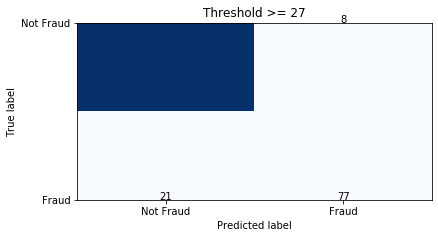

In [32]:
cnf_matrix = confusion_matrix(y_test['Fraud'], yhat_classes)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
class_names = ["Not Fraud","Fraud"]
plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

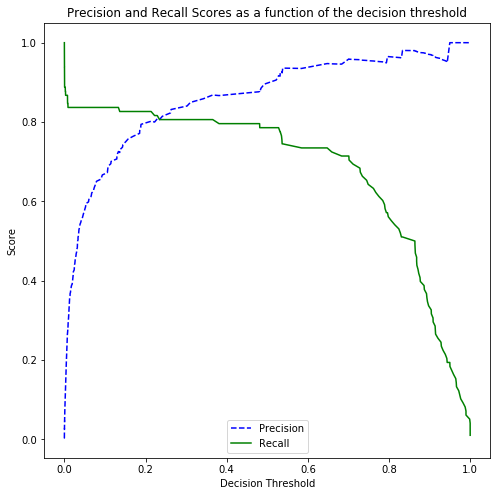

In [34]:
precision, recall, thresholds = precision_recall_curve(y_test['Fraud'], yhat_probs)
plot_precision_recall_vs_threshold(precision, recall, thresholds)

Lets visualize the histogram of probabilities and see where most of our probabilities are

Text(0, 0.5, 'Frequency')

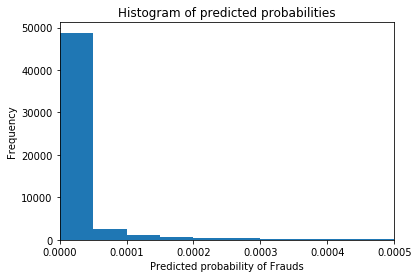

In [35]:
plt.hist(yhat_probs, bins=20000)

# x-axis limit from 0 to 1
plt.xlim(0,0.0005)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Frauds')
plt.ylabel('Frequency')

Senstivity metric in the testing dataset:  1.0
Specificity metric in the testing dataset:  0.08852856866503701


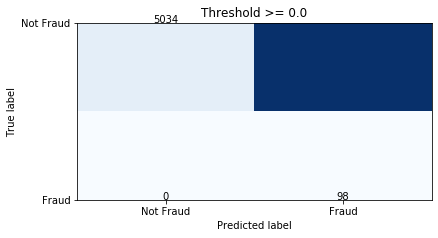

Senstivity metric in the testing dataset:  0.9591836734693877
Specificity metric in the testing dataset:  0.9018869915410724


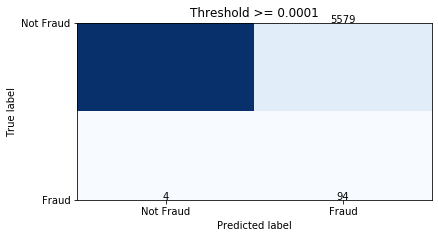

Senstivity metric in the testing dataset:  0.9489795918367347
Specificity metric in the testing dataset:  0.9368833863848196


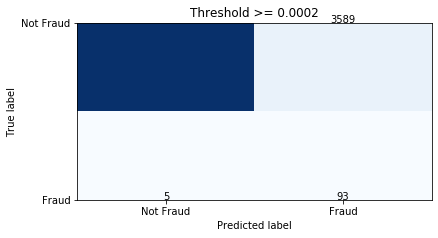

Senstivity metric in the testing dataset:  0.9387755102040817
Specificity metric in the testing dataset:  0.9515678033167437


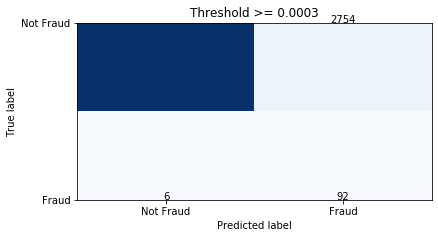

Senstivity metric in the testing dataset:  0.9081632653061225
Specificity metric in the testing dataset:  0.9593232857921672


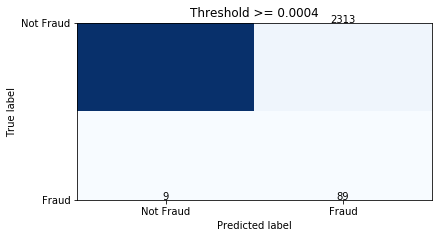

Senstivity metric in the testing dataset:  0.8979591836734694
Specificity metric in the testing dataset:  0.9652673970771856


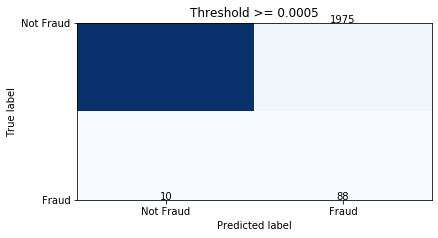

Senstivity metric in the testing dataset:  0.8877551020408163
Specificity metric in the testing dataset:  0.9692418620192392


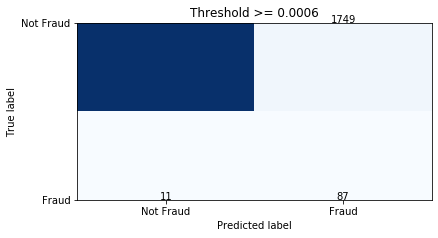

Senstivity metric in the testing dataset:  0.8877551020408163
Specificity metric in the testing dataset:  0.9724777095826812


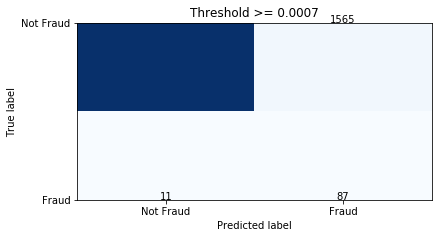

Senstivity metric in the testing dataset:  0.8877551020408163
Specificity metric in the testing dataset:  0.9749749397675114


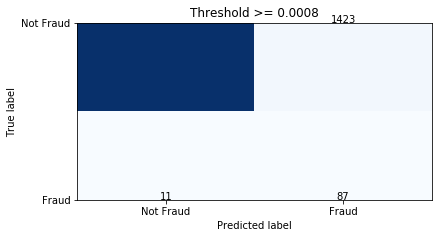

Senstivity metric in the testing dataset:  0.8877551020408163
Specificity metric in the testing dataset:  0.977225964159471


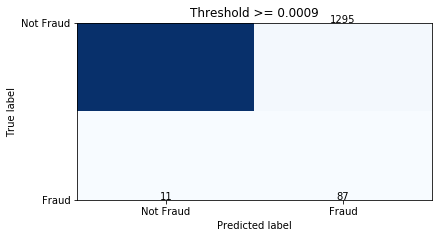

In [36]:
## finding the best threshold, using histogram, most the probs are below 0.0001

for i in [float(j) / 10000 for j in range(0, 10, 1)]:
    y_pred_class = binarize(yhat_probs.reshape(-1,1), i)
    cnf_matrix = confusion_matrix(y_test, y_pred_class)
    class_names = ["Not Fraud","Fraud"]
    print("Senstivity metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("Specificity metric in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall/Senstivity metric in the testing dataset:  0.9489795918367347
Specificity metric in the testing dataset:  0.9368833863848196


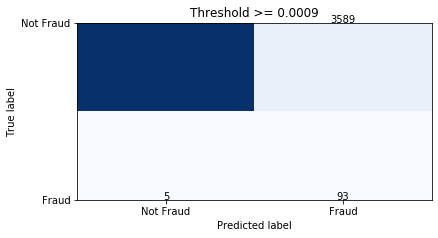

In [37]:
y_pred_class = binarize(yhat_probs.reshape(-1,1), 0.0002)

cnf_matrix = confusion_matrix(y_test, y_pred_class)

print("Recall/Senstivity metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Specificity metric in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

    # Plot non-normalized confusion matrix
class_names = ["Not Fraud","Fraud"]
plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)